<a href="https://colab.research.google.com/github/iskandardevan/tubes-i-ML/blob/main/Tubes02_ML_1301190414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Muhammad Iskandar Devanto 1301190414**

#**Muhammad Wima Fathurrahman**



# **Import library python**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# **Persiapan data**

In [ ]:
!gdown --id 1G2L_fwfpKtYdKC4o76o_wqNgdajvgbrr #Mengunduh file excel

DataKendaraan_test = pd.read_excel('kendaraan_test.xlsx')
DataKendaraan_test

Downloading...
From: https://drive.google.com/uc?id=1G2L_fwfpKtYdKC4o76o_wqNgdajvgbrr
To: /content/kendaraan_test.xlsx
100% 2.18M/2.18M [00:00<00:00, 34.1MB/s]


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


In [ ]:
!gdown --id 1rPN2Qi7LXmFj7Kx4ak18qCjsotxTA_3e

DataKendaraan_train = pd.read_excel('kendaraan_train.xlsx')
DataKendaraan_train.head()

Downloading...
From: https://drive.google.com/uc?id=1rPN2Qi7LXmFj7Kx4ak18qCjsotxTA_3e
To: /content/kendaraan_train.xlsx
100% 14.3M/14.3M [00:00<00:00, 87.1MB/s]


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# **Olah data**

## **Menghapus kolom id**

In [ ]:
DataKendaraan_train = DataKendaraan_train.drop('id',axis = 1)

## **Melihat data untuk mengetahui tipe data yang memiliki nilai NULL / NaN**

In [ ]:
DataKendaraan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
DataKendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


## **Cek missing value**

In [ ]:
missingValueKendaraan_test = DataKendaraan_test.isnull().sum().sort_values(ascending = True)
print(missingValueKendaraan_test)

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [ ]:
missingValueKendaraan_train = DataKendaraan_train.isnull().sum().sort_values(ascending = True)
print(missingValueKendaraan_train)

Tertarik                 0
Lama_Berlangganan    13992
Kendaraan_Rusak      14188
Umur                 14214
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kanal_Penjualan      14299
Kode_Daerah          14306
SIM                  14404
Jenis_Kelamin        14440
Premi                14569
dtype: int64


# **Skewness value**

## **Cek skewness value**

### kendaraaan_test

In [ ]:
sv = ['Umur', 'Kode_Daerah', 'Sudah_Asuransi', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']
DataKendaraan_train[sv].skew(axis = 0, skipna = True)

Umur                 0.671077
Kode_Daerah         -0.116322
Sudah_Asuransi       0.165452
Premi                1.656493
Kanal_Penjualan     -0.899909
Lama_Berlangganan    0.003858
dtype: float64

### kendaraan_train

In [ ]:
sv = ['Umur', 'Kode_Daerah', 'Sudah_Asuransi', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']
DataKendaraan_test[sv].skew(axis = 0, skipna = True)

Umur                 0.675795
Kode_Daerah         -0.108716
Sudah_Asuransi       0.170185
Premi                2.033392
Kanal_Penjualan     -0.906052
Lama_Berlangganan   -0.001749
dtype: float64

## **Preprocessing label encoder skewness value**

### kendaraan_test

In [ ]:
labelEncoder_JenisKelamin = preprocessing.LabelEncoder()
labelEncoder_KendaraanRusak = preprocessing.LabelEncoder()
labelEncoder_UmurKendaraan = preprocessing.LabelEncoder()

DataKendaraan_test = DataKendaraan_test[DataKendaraan_test['Jenis_Kelamin'].notna()]
DataKendaraan_test = DataKendaraan_test[DataKendaraan_test['Kendaraan_Rusak'].notna()]
DataKendaraan_test = DataKendaraan_test[DataKendaraan_test['Umur_Kendaraan'].notna()]

DataKendaraan_test['Jenis_Kelamin'] = labelEncoder_JenisKelamin.fit_transform(DataKendaraan_test['Jenis_Kelamin'])
DataKendaraan_test['Kendaraan_Rusak'] = labelEncoder_KendaraanRusak.fit_transform(DataKendaraan_test['Kendaraan_Rusak'])
DataKendaraan_test['Umur_Kendaraan'] = labelEncoder_UmurKendaraan.fit_transform(DataKendaraan_test['Umur_Kendaraan'])

print(DataKendaraan_test['Jenis_Kelamin'].unique())
print(DataKendaraan_test['Kendaraan_Rusak'].unique())
print(DataKendaraan_test['Umur_Kendaraan'].unique())

[1 0]
[0 1]
[0 1 2]


In [ ]:
DataKendaraan_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Jenis_Kelamin      47639 non-null  int64
 1   Umur               47639 non-null  int64
 2   SIM                47639 non-null  int64
 3   Kode_Daerah        47639 non-null  int64
 4   Sudah_Asuransi     47639 non-null  int64
 5   Umur_Kendaraan     47639 non-null  int64
 6   Kendaraan_Rusak    47639 non-null  int64
 7   Premi              47639 non-null  int64
 8   Kanal_Penjualan    47639 non-null  int64
 9   Lama_Berlangganan  47639 non-null  int64
 10  Tertarik           47639 non-null  int64
dtypes: int64(11)
memory usage: 4.4 MB


### kendaraan_train

In [ ]:
labelEncoder_JenisKelamin = preprocessing.LabelEncoder()
labelEncoder_KendaraanRusak = preprocessing.LabelEncoder()
labelEncoder_UmurKendaraan = preprocessing.LabelEncoder()

DataKendaraan_train = DataKendaraan_train[DataKendaraan_train['Jenis_Kelamin'].notna()]
DataKendaraan_train = DataKendaraan_train[DataKendaraan_train['Kendaraan_Rusak'].notna()]
DataKendaraan_train = DataKendaraan_train[DataKendaraan_train['Umur_Kendaraan'].notna()]

DataKendaraan_train['Jenis_Kelamin'] = labelEncoder_JenisKelamin.fit_transform(DataKendaraan_train['Jenis_Kelamin'])
DataKendaraan_train['Kendaraan_Rusak'] = labelEncoder_KendaraanRusak.fit_transform(DataKendaraan_train['Kendaraan_Rusak'])
DataKendaraan_train['Umur_Kendaraan'] = labelEncoder_UmurKendaraan.fit_transform(DataKendaraan_train['Umur_Kendaraan'])

print(DataKendaraan_train['Jenis_Kelamin'].unique())
print(DataKendaraan_train['Kendaraan_Rusak'].unique())
print(DataKendaraan_train['Umur_Kendaraan'].unique())

[1 0]
[1 0]
[1 2 0]


In [ ]:
DataKendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244996 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      244996 non-null  int64  
 1   Umur               232810 non-null  float64
 2   SIM                232646 non-null  float64
 3   Kode_Daerah        232772 non-null  float64
 4   Sudah_Asuransi     232752 non-null  float64
 5   Umur_Kendaraan     244996 non-null  int64  
 6   Kendaraan_Rusak    244996 non-null  int64  
 7   Premi              232569 non-null  float64
 8   Kanal_Penjualan    232702 non-null  float64
 9   Lama_Berlangganan  233015 non-null  float64
 10  Tertarik           244996 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 22.4 MB


## **Handling empty data**

In [ ]:
print("Duplikat perhitungan baris :", DataKendaraan_train.duplicated().sum())
print("Missing Values")
DataKendaraan_train.isna().sum()

Duplikat perhitungan baris : 167
Missing Values


Jenis_Kelamin            0
Umur                 12186
SIM                  12350
Kode_Daerah          12224
Sudah_Asuransi       12244
Umur_Kendaraan           0
Kendaraan_Rusak          0
Premi                12427
Kanal_Penjualan      12294
Lama_Berlangganan    11981
Tertarik                 0
dtype: int64

In [ ]:
filterDatakendaraan_train = DataKendaraan_train.select_dtypes(include = ['float64'])

for column in filterDatakendaraan_train.columns.values.tolist() :
  if column != 'Kode_Daerah' and column != 'Kanal_Penjualan' :
    rerata = round(DataKendaraan_train[column].astype("float").mean(axis=0))
    print('Rerata '+ column, end=": ")
    print(rerata)
    DataKendaraan_train[column].replace(np.nan, rerata, inplace=True)

DataKendaraan_train = DataKendaraan_train[DataKendaraan_train['Kode_Daerah'].notna()]
DataKendaraan_train = DataKendaraan_train[DataKendaraan_train['Kanal_Penjualan'].notna()]
DataKendaraan_train = DataKendaraan_train.drop_duplicates()

Rerata Umur: 39
Rerata SIM: 1
Rerata Sudah_Asuransi: 0
Rerata Premi: 30535
Rerata Lama_Berlangganan: 154


### Membuat histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7fd1d4cd0>,
      dtype=object)

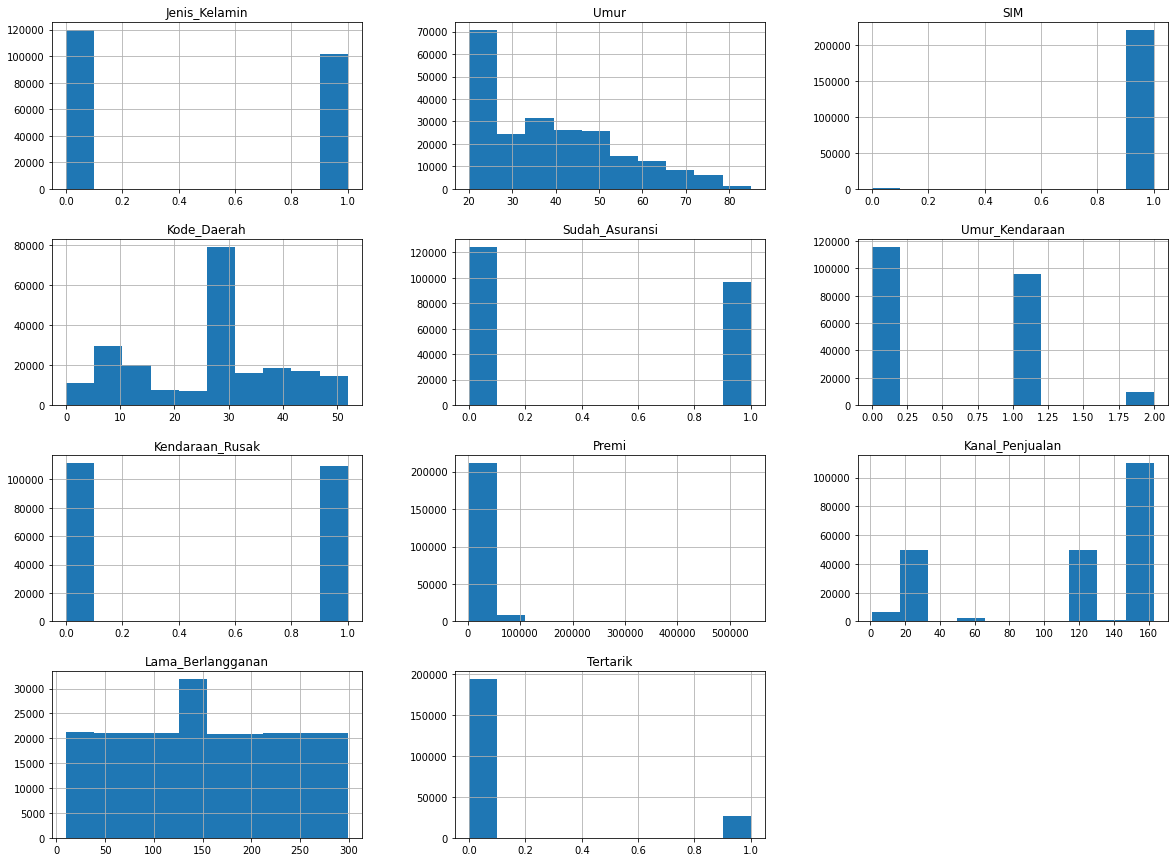

In [ ]:
DataKendaraan_train.hist(figsize = [20,15])

### menghilangkan outliner menggunakan metode z-score

In [ ]:
z_score = stats.zscore(DataKendaraan_train)
absis_z_score = np.abs(z_score)
filterData = (absis_z_score < 3).all(axis = 1)
removeOutlinerKendaraan_train = DataKendaraan_train[filterData]

In [ ]:
print("Data sebelum outliner dihapus :", DataKendaraan_train.shape)
print("Data setelah outliner dihapus :", removeOutlinerKendaraan_train.shape)

Data sebelum outliner dihapus : (220896, 11)
Data setelah outliner dihapus : (219207, 11)


In [ ]:
DataTrain_Lama = DataKendaraan_train
DataKendaraan_train = removeOutlinerKendaraan_train

In [ ]:
DataKendaraan_train['SIM'].value_counts()

1.0    219207
Name: SIM, dtype: int64

In [ ]:
DataKendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219207 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      219207 non-null  int64  
 1   Umur               219207 non-null  float64
 2   SIM                219207 non-null  float64
 3   Kode_Daerah        219207 non-null  float64
 4   Sudah_Asuransi     219207 non-null  float64
 5   Umur_Kendaraan     219207 non-null  int64  
 6   Kendaraan_Rusak    219207 non-null  int64  
 7   Premi              219207 non-null  float64
 8   Kanal_Penjualan    219207 non-null  float64
 9   Lama_Berlangganan  219207 non-null  float64
 10  Tertarik           219207 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 20.1 MB


### Drop kolom yang tidak digunakan

In [ ]:
#kendaraan_test
dropKolom = ['SIM']
DataKendaraan_test = DataKendaraan_test.drop(dropKolom, axis = 1)

#kendaraan_train
dropKolom = ['SIM']
DataKendaraan_train = DataKendaraan_train.drop(dropKolom, axis = 1)

### Membuat heatmap

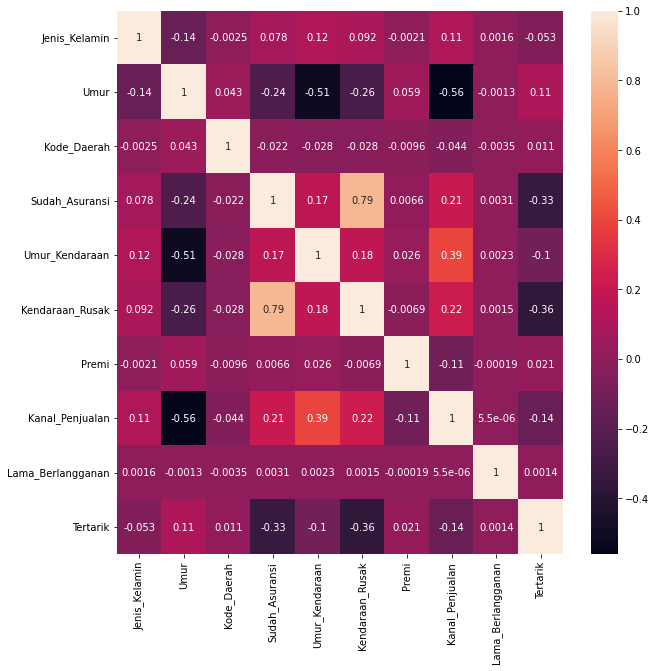

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(DataKendaraan_train.corr(), annot = True)

### Seleksi data

**kendaraan_test**

In [ ]:
DataKendaraanTest_y = DataKendaraan_test['Tertarik']
DataKendaraanTest_y

0        0
1        0
2        0
3        0
4        0
        ..
47634    0
47635    0
47636    0
47637    1
47638    0
Name: Tertarik, Length: 47639, dtype: int64

In [ ]:
seleksiData_test = DataKendaraan_test
DataKendaraanTest_x = seleksiData_test
DataKendaraanTest_x.drop(columns = ['Tertarik'], inplace = True)

In [ ]:
scaler = preprocessing.MinMaxScaler()
DataKendaraanTest_x = scaler.fit_transform(DataKendaraanTest_x)

In [ ]:
DataBaru_test = pd.DataFrame(DataKendaraanTest_x, columns = seleksiData_test.columns)
DataBaru_test

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.0,0.446154,0.153846,0.0,0.0,0.0,0.082475,0.154321,0.467128
1,0.0,0.030769,0.903846,1.0,0.5,1.0,0.068822,0.932099,0.799308
2,0.0,0.061538,0.538462,1.0,0.5,1.0,0.200636,0.932099,0.179931
3,0.0,0.400000,0.153846,1.0,0.0,1.0,0.062575,0.759259,0.083045
4,0.0,0.230769,0.442308,0.0,0.0,0.0,0.045268,0.932099,0.757785
...,...,...,...,...,...,...,...,...,...
47634,0.0,0.630769,0.884615,0.0,1.0,0.0,0.052851,0.759259,0.197232
47635,0.0,0.323077,0.288462,0.0,0.0,0.0,0.000000,0.962963,0.768166
47636,0.0,0.061538,0.557692,1.0,0.5,1.0,0.056687,0.932099,0.695502
47637,0.0,0.600000,0.576923,0.0,0.0,0.0,0.065406,0.154321,0.792388


In [ ]:
DataBaru_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jenis_Kelamin      47639 non-null  float64
 1   Umur               47639 non-null  float64
 2   Kode_Daerah        47639 non-null  float64
 3   Sudah_Asuransi     47639 non-null  float64
 4   Umur_Kendaraan     47639 non-null  float64
 5   Kendaraan_Rusak    47639 non-null  float64
 6   Premi              47639 non-null  float64
 7   Kanal_Penjualan    47639 non-null  float64
 8   Lama_Berlangganan  47639 non-null  float64
dtypes: float64(9)
memory usage: 3.3 MB


**kendaraan_train**

In [ ]:
DataKendaraanTrain_y = DataKendaraan_train['Tertarik']
DataKendaraanTrain_y

0         0
1         0
3         0
5         0
7         0
         ..
285826    0
285827    0
285828    0
285829    0
285830    0
Name: Tertarik, Length: 219207, dtype: int64

In [ ]:
seleksiData_train = DataKendaraan_train
DataKendaraanTrain_x = seleksiData_train
DataKendaraanTrain_x.drop(columns = ['Tertarik'], inplace = True)

In [ ]:
scaler = preprocessing.MinMaxScaler()
DataKendaraanTrain_x = scaler.fit_transform(DataKendaraanTrain_x)

In [ ]:

DataBaru_train = pd.DataFrame(DataKendaraanTrain_x, columns = seleksiData_train.columns)
DataBaru_train

,Jenis_Kelamin,Umur,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.0,0.156250,0.634615,1.0,0.5,1.0,0.325637,0.932099,0.301038
1,0.0,0.437500,0.750000,0.0,1.0,0.0,0.297059,0.172840,0.512111
2,1.0,0.593750,0.923077,0.0,0.0,1.0,0.000000,0.759259,0.183391
3,0.0,0.015625,0.673077,1.0,0.5,1.0,0.257763,0.932099,0.557093
4,0.0,0.046875,0.538462,1.0,0.5,1.0,0.310764,0.932099,0.733564
...,...,...,...,...,...,...,...,...,...
219202,1.0,0.046875,0.076923,1.0,0.5,1.0,0.299469,0.932099,0.716263
219203,1.0,0.015625,0.884615,1.0,0.5,1.0,0.539193,0.932099,0.138408
219204,1.0,0.046875,0.961538,1.0,0.5,1.0,0.604131,0.932099,0.747405
219205,0.0,0.750000,0.134615,1.0,0.0,1.0,0.357355,0.759259,0.899654


In [ ]:
DataBaru_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219207 entries, 0 to 219206
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      219207 non-null  float64
 1   Umur               219207 non-null  float64
 2   Kode_Daerah        219207 non-null  float64
 3   Sudah_Asuransi     219207 non-null  float64
 4   Umur_Kendaraan     219207 non-null  float64
 5   Kendaraan_Rusak    219207 non-null  float64
 6   Premi              219207 non-null  float64
 7   Kanal_Penjualan    219207 non-null  float64
 8   Lama_Berlangganan  219207 non-null  float64
dtypes: float64(9)
memory usage: 15.1 MB


EXPORT DATA PREPROCESSING

In [ ]:
DataBaru_train.to_csv("hasil_train_preprocessing.csv")

In [ ]:
DataBaru_test.to_csv("hasil_test_preprocessing.csv")

#PEMODELAN

### Menyimpan Data Pemodelan

In [ ]:
Result = pd.DataFrame(columns = ['Classifier', 'Akurasi'])

### Naive model

In [ ]:
NaiveModel = GaussianNB()
NaiveModel.fit(DataKendaraanTrain_x, DataKendaraanTrain_y)

GaussianNB()

In [ ]:
prediksi_y = NaiveModel.predict(DataKendaraanTest_x)

In [ ]:
class NaiveBayesClassifier():
    def hitung_prior(self, features, target): #fungsi menghitung prior untuk setiap kelas
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        return self.prior
    
    def hitung_statistics(self, features, target): #fungsi menghitung mean dan variance untuk setiap kolom
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def hitung_gaussian_density(self, class_idx, x): #fungsi menghitung probability dari gaussian density
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        a = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        b = np.sqrt(2 * np.pi * var)
        prob = a / b
        return prob #mengembalikan nilai probabilitas
    
    def hitung_posterior(self, x): #fungsi menghitung probabilitas dari posterior
        posteriors = []

        for i in range(self.count):
            prior = np.log(self.prior[i])
            conditional = np.sum(np.log(self.hitung_gaussian_density(i, x)))
            posterior = prior + conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]
        
    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.hitung_statistics(features, target)
        self.hitung_prior(features, target)
        
    def predict(self, features):
        preds = [self.hitung_posterior(f) for f in features.to_numpy()]
        return preds

In [ ]:
def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return f'{round(accuracy * 100, 2)}%'

In [ ]:
# set features dan target
# split antara train dan test
X_train, y_train = DataBaru_train, DataKendaraanTrain_y
X_test, y_test = DataBaru_test, DataKendaraanTest_y

print(X_train[:5], y_train[:5])
print(X_test[:5], y_test[:5])

   Jenis_Kelamin      Umur  ...  Kanal_Penjualan  Lama_Berlangganan
0            1.0  0.156250  ...         0.932099           0.301038
1            0.0  0.437500  ...         0.172840           0.512111
2            1.0  0.593750  ...         0.759259           0.183391
3            0.0  0.015625  ...         0.932099           0.557093
4            0.0  0.046875  ...         0.932099           0.733564

[5 rows x 9 columns] 0    0
1    0
3    0
5    0
7    0
Name: Tertarik, dtype: int64
   Jenis_Kelamin      Umur  ...  Kanal_Penjualan  Lama_Berlangganan
0            1.0  0.446154  ...         0.154321           0.467128
1            0.0  0.030769  ...         0.932099           0.799308
2            0.0  0.061538  ...         0.932099           0.179931
3            0.0  0.400000  ...         0.759259           0.083045
4            0.0  0.230769  ...         0.932099           0.757785

[5 rows x 9 columns] 0    0
1    0
2    0
3    0
4    0
Name: Tertarik, dtype: int64


In [ ]:
# train model
x = NaiveBayesClassifier()
x.fit(X_train, y_train)

In [ ]:
x.classes, x.feature_nums, x.rows, x.count

(array([0, 1]), 9, 219207, 2)

In [ ]:
x.hitung_prior(X_train, y_train)

array([0.67410256, 0.09369683])

In [ ]:
x.hitung_statistics(X_train, y_train)

(array([[0.45920632, 0.29281194, 0.507799  , 0.43681988, 0.25998525,
         0.49554707, 0.35197606, 0.68840161, 0.49888669],
        [0.4556697 , 0.29467263, 0.50784343, 0.43487998, 0.25327426,
         0.49510687, 0.3503248 , 0.68311385, 0.49847981]]),
 array([[0.24833588, 0.05571721, 0.06519458, 0.24600827, 0.08338928,
         0.24998017, 0.03825815, 0.11114578, 0.08013619],
        [0.24803482, 0.05546507, 0.06485764, 0.24575938, 0.08159927,
         0.24997606, 0.03821009, 0.11281377, 0.07906248]]))

In [ ]:
x.mean

array([[0.45920632, 0.29281194, 0.507799  , 0.43681988, 0.25998525,
        0.49554707, 0.35197606, 0.68840161, 0.49888669],
       [0.4556697 , 0.29467263, 0.50784343, 0.43487998, 0.25327426,
        0.49510687, 0.3503248 , 0.68311385, 0.49847981]])

In [ ]:
x.var

array([[0.24833588, 0.05571721, 0.06519458, 0.24600827, 0.08338928,
        0.24998017, 0.03825815, 0.11114578, 0.08013619],
       [0.24803482, 0.05546507, 0.06485764, 0.24575938, 0.08159927,
        0.24997606, 0.03821009, 0.11281377, 0.07906248]])

In [ ]:
predictions = x.predict(X_test)

In [ ]:
print(f'accuracy naive bayes = {accuracy(y_test, predictions)}')

accuracy naive bayes = 87.7%


In [ ]:
SkorAkurasi = accuracy_score(y_test, predictions)/10.0
rModel = pd.DataFrame([['Naive Bayes', SkorAkurasi]], columns=['Classifier', 'Akurasi'])
Result = Result.append(rModel)

#EVALUASI

#EKSPERIMEN

###Random Forest Model

In [ ]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predict_y = RandomForest.predict(X_test)

In [ ]:
resultAccuracy = accuracy_score(y_test, predict_y)/10.0
rModel = pd.DataFrame([['Random Forest', resultAccuracy]], columns=['Classifier', 'Akurasi'])
Result = Result.append(rModel)

In [ ]:
print("Accuracy Random Forest = {} %".format( 100 * accuracy_score(predict_y, y_test)))

Accuracy Random Forest = 86.58662020613363 %


In [ ]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     41778
           1       0.37      0.13      0.20      5861

    accuracy                           0.87     47639
   macro avg       0.63      0.55      0.56     47639
weighted avg       0.83      0.87      0.84     47639



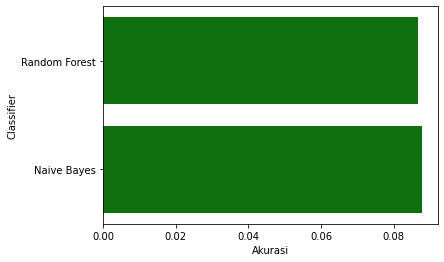

In [ ]:
sns.set_color_codes('muted')
sns.barplot(x='Akurasi', y='Classifier', data=Result, color='green')